# Credit Card Fraud Detection

### Introduction:
The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.

## Downloading the Dataset
The dataset has been downloaded from Kaggle Dataset. The dataset contains only one csv file i.e creditcard.csv and it has been used in this project for the analysis. 

## Importing all required packages
Import the upgraded version of all libraries to be used in the project

In [1]:
# for numerical analyiss
import numpy as np

# to store and process data in dataframe
import pandas as pd

# basic visualization package
import matplotlib.pyplot as plt

# advanced plotting
import seaborn as sns

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# statistical plotting
from scipy import stats
from scipy.stats import norm, skew

# model splitting
from sklearn.model_selection import train_test_split

#### Reading a CSV file using Pandas:
Pandas is a popular Python library used for working in tabular data (similar to the data stored in a spreadsheet). Pandas provides helper functions to read data from various file formats like CSV, Excel spreadsheets, HTML tables, JSON, SQL, and more. Let's download a file creditcard.csv which contains creditcard transaction data from kaggle.

## Load the dataset

Now we use read.csv() function from pandas to read the data from the csv and stores in the form of a data frame. Data from the file is read and stored in a DataFrame object - one of the core data structures in Pandas for storing and working with tabular data.

In [2]:
data = pd.read_csv('creditcard.csv')

## View the data 

In [3]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Deep Copy and Shallow Copy

The new data frame df_copy is simply a "view" of the original data frame data. Both point to the same data in the computer's memory. Changing any values inside one of them will also change the respective values in the other.

Sharing data between data frames makes data manipulation in Pandas blazing fast. You needn't worry about the overhead of copying thousands or millions of rows every time you want to create a new data frame by operating on an existing one.

Sometimes you might need a full copy of the data frame, in which case you can use the copy method.

In [4]:
df_copy = data   # will be using data_copy further by creating a copy from df so that the original is intact

The data within 'df_copy' is completely separate from data, and changing values inside one of them will not affect the other.
View the copied dataframe

In [5]:
df_copy

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Exploratory Data Analysis
We can use the .head and .tail methods to view the first or last few rows of data.

In [6]:
# using head function we can retreive the top data

df_copy.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# using tail function we can retreive the bottom data

df_copy.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


We can view some basic information about the data frame using the .info method.

In [8]:
# Get the information about the Credit card dataframe

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# To find the unique Class in data.

df_copy.Class.unique()

array([0, 1])

In [10]:
df_copy['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
# Missing data
df_copy.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

It appears that each column contains values of a specific data type. You can view statistical information for numerical columns (mean, standard deviation, minimum/maximum values, and the number of non-empty values) using the .describe method.

In [12]:
# statistics details of the data.

df_copy.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


We can also retrieve the number of rows and columns in the data frame using the .shape method.

In [13]:
# .shape gives the tuple of the rows and the columns 

df_copy.shape

(284807, 31)

## Data Cleaning

In [14]:
# we drop Time as it does not give any meaningful info

df_copy.drop('Time', axis=1, inplace=True)  

In [15]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [16]:
# .shape gives the tuple of the rows and the columns 

df_copy.shape

(284807, 30)

## Feature Selection


In [17]:
# Splitting the dataset

X = df_copy[['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount']]
y = df_copy[['Class']]

In [18]:
# FEATURE SELECTION - UNIVERATE SELECTION
# ANOVA FEATURE SELECTION - Analysis of Variance
# (DO NOT ACCEPT NEGATIVE VALUES)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X,y)

In [19]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df_copy.columns)

# CONCAT TWO DATAFRAMES FOR BETTER VISUALIZATION 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['col_names','accuracy']              # NAMING THE DATAFRAME COLUMNS
print(featureScores.nlargest(20,'accuracy'))                   # PRINT THE BEST FEATURES

   col_names      accuracy
16       V17  33979.168593
13       V14  28695.547788
11       V12  20749.822361
9        V10  14057.979985
15       V16  11443.349428
2         V3  11014.508305
6         V7  10349.605408
10       V11   6999.355047
3         V4   5163.832114
17       V18   3584.380605
0         V1   2955.668946
8         V9   2746.600273
4         V5   2592.357929
1         V2   2393.401678
5         V6    543.510578
20       V21    465.916251
18       V19    344.990997
19       V20    114.999731
7         V8    112.548287
26       V27     88.045296


## Split the Data 


In [20]:
X1 = df_copy[['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount']]

y1 = df_copy[['Class']]

In [21]:
X1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [22]:
y1

,Class
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


In [23]:
# .shape gives the tuple of the rows and the columns 

X1.shape, y1.shape

((284807, 29), (284807, 1))

## Visualization of Credit card fraud detection dataset
Data visualization is the representation of data or information in a graph, chart, or other visual format. It communicates relationships of the data with images.

This is important because it allows trends and patterns to be more easily seen. With the rise of big data upon us, we need to be able to interpret increasingly larger batches of data. Machine learning makes it easier to conduct analyses such as predictive analysis, which can then serve as helpful visualizations to present.

But data visualization is not only important for data scientists and data analysts, it is necessary to understand data visualization in any career. Whether we work in finance, marketing, tech, design, or anything else, we need to visualize data.

### To calculate the number of class in creditcard data:
To visualize this we use count plot for better and easy calculation

A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot() , so you can compare counts across nested variables.

<AxesSubplot:title={'center':'Count of Class'}, xlabel='Class', ylabel='count'>

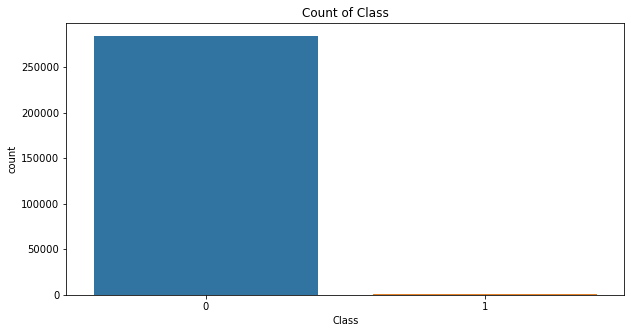

In [24]:
## Categorical Plot:
# We use Count Plot to visualize the Count of WHO Region:

plt.figure(figsize=[10, 5])
plt.title('Count of Class')
sns.countplot(x='Class',data=df_copy)

The above graph gives the Count of class that belong to credit card transanction dataset

### To calculate the Correlation matrix of COVID data:
Correlation is a statistical technique that shows how two variables are related. Pandas dataframe. corr() method is used for creating the correlation matrix. It is used to find the pairwise correlation of all columns in the dataframe. For any non-numeric data type columns in the dataframe it is ignored.

In [25]:
#Correlation:

df_copy.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,7.388135e-17,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,-3.991394e-16,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,1.156587e-15,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,2.232685e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,-5.202306e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,5.932243e-17,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,-7.492834e-17,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,-2.801370e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,-4.642274e-16,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733
V10,7.388135e-17,-3.991394e-16,1.156587e-15,2.232685e-16,-5.202306e-16,5.932243e-17,-7.492834e-17,-2.801370e-16,-4.642274e-16,1.000000e+00,...,1.177547e-15,-6.418202e-16,3.214491e-16,-1.355885e-16,-2.846052e-16,-3.028119e-16,-2.197977e-16,4.864782e-17,-0.101502,-0.216883


The measure is best used in variables that demonstrate a linear relationship between each other.

### The Visual Representation of the above matrix:
A correlation matrix is a tabular data representing the 'correlations' between pairs of variables in a given data. Each row and column represents a variable, and each value in this matrix is the correlation coefficient between the variables represented by the corresponding row and column

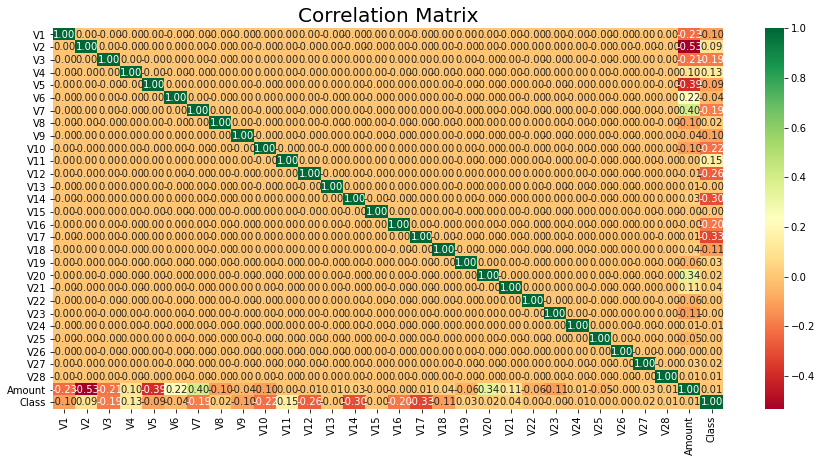

In [26]:
# Correlation matrix visualization

f, ax = plt.subplots(figsize= [15, 7])
sns.heatmap(df_copy.corr(), annot=True, fmt=".2f", cmap="RdYlGn")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

Here, from the above graph it is clearly shown that the dark green color which contains the value of 1.00 is the variable that has the highest correlation relation and the dark red represent that those variables has the least correlation relation between them.

The colour variation range is shown separately at the right side of the graph.

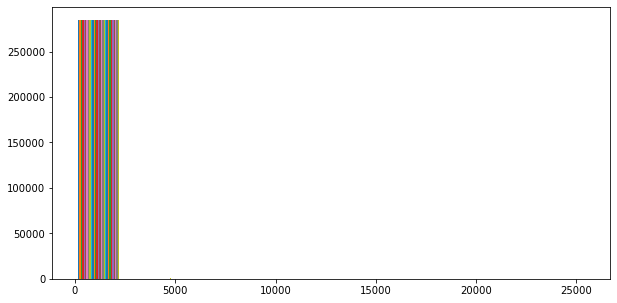

In [27]:
# Visual representation of X split by Histogram:

plt.figure(figsize=[10, 5])
plt.hist(X1)
plt.show()

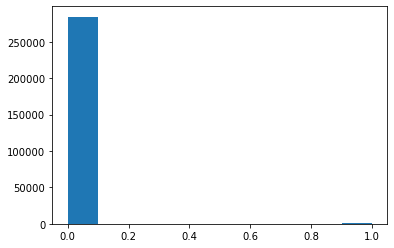

In [28]:
# Visual representation of Y split by Histogram:

plt.hist(y1)
plt.show()

<AxesSubplot:title={'center':'Skewness of Class'}, xlabel='Class', ylabel='Density'>

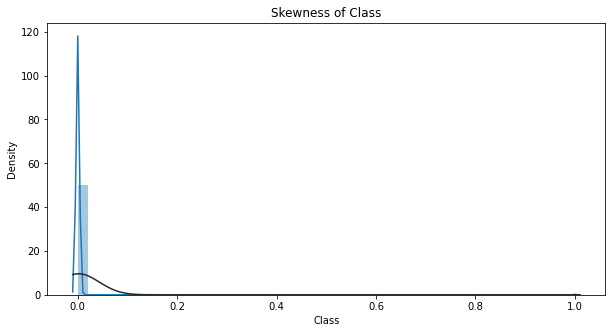

In [29]:
#Skewness:(feature- dependent variable)

plt.figure(figsize=[10, 5])
plt.title('Skewness of Class')
sns.distplot(df_copy['Class'], fit=norm)

## train and test split method

In [30]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=12)

## Apply the model
# Logistic Regression Algorithm

In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=12)
model.fit(X1,y1)

LogisticRegression(random_state=12)

### Evaluation

## Predict using test data 


In [32]:
new_data = [1.19185711131486,0.26615071205963,0.16648011335321,0.448154078460911,0.0600176492822243,-0.0823608088155687,-0.0788029833323113,0.0851016549148104,-0.255425128109186,-0.166974414004614,1.61272666105479,1.06523531137287,0.48909501589608,-0.143772296441519,0.635558093258208,0.463917041022171,-0.114804663102346,-0.183361270123994,-0.145783041325259,-0.0690831352230203,-0.225775248033138,-0.638671952771851,0.101288021253234,-0.339846475529127,0.167170404418143,0.125894532368176,-0.00898309914322813,0.0147241691924927,2.69]
print(model.predict([new_data]))                             # 0_ans

[0]


In [33]:
y1_pred = model.predict(X1_test)
print(y1_pred)

[0 1 0 ... 0 0 0]


## Confusion Matrix

In [34]:
from sklearn.metrics import confusion_matrix

accuracy = confusion_matrix(y1_test,y1_pred)
accuracy

array([[56858,    11],
       [   32,    61]])

## Accuracy Score

In [35]:
from sklearn.metrics import accuracy_score

accuracyscore = accuracy_score(y1_test,y1_pred)
accuracyscore

0.9992451107756047

### Other Statistical accuracy 

## F1 Score


In [36]:
from sklearn.metrics import f1_score
print("F1 Score",f1_score(y1_test,y1_pred))

F1 Score 0.7393939393939394


## Precision Score


In [37]:
from sklearn.metrics import precision_score

print(precision_score(y1_test,y1_pred))

0.8472222222222222


## Recall Score

In [38]:
from sklearn.metrics import recall_score

print(recall_score(y1_test,y1_pred))

0.6559139784946236


## Roc Curve

In [39]:
from sklearn.metrics import roc_curve

print(roc_curve(y1_test,y1_pred))

(array([0.00000000e+00, 1.93426999e-04, 1.00000000e+00]), array([0.        , 0.65591398, 1.        ]), array([2, 1, 0]))


## Auc Curve

In [40]:
from sklearn.metrics import auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y1_test,y1_pred)
print(auc(false_positive_rate, true_positive_rate))

0.8278602757478656


## Roc_Auc Curve


In [41]:
from sklearn.metrics import roc_auc_score 

print(roc_auc_score(y1_test,y1_pred))

0.8278602757478656


## Classification Report

In [42]:
from sklearn.metrics import classification_report

model = LogisticRegression(random_state=12)
model.fit(X1_train,y1_train)

y1_pred = model.predict(X1_test)
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.86      0.67      0.75        93

    accuracy                           1.00     56962
   macro avg       0.93      0.83      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [43]:
# Accuracy Score of Logistic Regression Model:
from sklearn.metrics import accuracy_score

model = LogisticRegression(random_state=12)
model.fit(X1_train,y1_train)

y1_pred = model.predict(X1_test)
print(accuracy_score(y1_test,y1_pred))

0.9992802219023208


In [44]:
# F1 Score of Logistic Regression Model:
from sklearn.metrics import f1_score

model = LogisticRegression(random_state=12)
model.fit(X1_train,y1_train)

y1_pred = model.predict(X1_test)
print(f1_score(y1_test,y1_pred))

0.7515151515151516


# Decision Tree Classifier Algorithm

In [45]:
from sklearn.tree import DecisionTreeClassifier

modelDT = DecisionTreeClassifier(random_state=0, max_depth=5)
modelDT.fit(X1,y1)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [46]:
modelDT = DecisionTreeClassifier(random_state=0, max_depth=5)
modelDT.fit(X1_train,y1_train)

y1_pred = modelDT.predict(X1_test)
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.91      0.77      0.84        93

    accuracy                           1.00     56962
   macro avg       0.96      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [47]:
# Accuracy Score of Decision Tree Classifier Model:
modelDT = DecisionTreeClassifier(random_state=0, max_depth=5)
modelDT.fit(X1_train,y1_train)

y1_pred = modelDT.predict(X1_test)
print(accuracy_score(y1_test,y1_pred))

0.9995084442259752


In [48]:
# F1 Score of Decision Tree Classifier Model:
modelDT = DecisionTreeClassifier(random_state=0, max_depth=5)
modelDT.fit(X1_train,y1_train)

y1_pred = modelDT.predict(X1_test)
print(f1_score(y1_test,y1_pred))

0.8372093023255814


# Random Forest Classifier Algorithm`

In [49]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier(n_estimators=10, criterion='gini')
modelRF.fit(X1,y1)

RandomForestClassifier(n_estimators=10)

In [50]:
modelRF = RandomForestClassifier(n_estimators=10, criterion='gini')
modelRF.fit(X1_train,y1_train)

y1_pred = modelRF.predict(X1_test)
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.93      0.80      0.86        93

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [51]:
# Accuracy Score of Random Forest Classifier Model:
modelRF = RandomForestClassifier(n_estimators=10, criterion='gini')
modelRF.fit(X1_train,y1_train)

y1_pred = modelRF.predict(X1_test)
print(accuracy_score(y1_test,y1_pred))

0.9995611109160493


In [52]:
# F1 Score of Random Forest Classifier Model:
modelRF = RandomForestClassifier(n_estimators=10, criterion='gini')
modelRF.fit(X1_train,y1_train)

y1_pred = modelRF.predict(X1_test)
print(f1_score(y1_test,y1_pred)) 

0.8554913294797687


# Naive Bayes 

In [53]:
from sklearn.naive_bayes import GaussianNB

modelNB = GaussianNB()
modelNB.fit(X1,y1)

GaussianNB()

In [54]:
modelNB = GaussianNB()
modelNB.fit(X1_train,y1_train)

y1_pred = modelNB.predict(X1_test)
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56869
           1       0.06      0.83      0.11        93

    accuracy                           0.98     56962
   macro avg       0.53      0.90      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [55]:
# F1 Score of Guassian Naive Bayes Model:
modelNB = GaussianNB()
modelNB.fit(X1_train,y1_train)

y1_pred = modelNB.predict(X1_test)
print(f1_score(y1_test,y1_pred))

0.10814606741573034


In [56]:
# Accuracy Score of Guassian Naive Bayes Model:
modelNB = GaussianNB()
modelNB.fit(X1_train,y1_train)

y1_pred = modelNB.predict(X1_test)
print(accuracy_score(y1_test,y1_pred))

0.9777044345353042


# K-Nearest Neighbors Classifier


In [57]:
from sklearn.neighbors import KNeighborsClassifier

modelKNN = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
modelKNN.fit(X1,y1)

KNeighborsClassifier()

In [58]:
modelKNN = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
modelKNN.fit(X1_train,y1_train)

y1_pred = modelKNN.predict(X1_test)
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.97      0.71      0.82        93

    accuracy                           1.00     56962
   macro avg       0.99      0.85      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [59]:
# F1 Score of K Nearest Neighbors Classifier Model:
modelKNN = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
modelKNN.fit(X1_train,y1_train)

y1_pred = modelKNN.predict(X1_test)
print(f1_score(y1_test,y1_pred))

0.8198757763975156


In [60]:
# Accuracy Score of K Nearest Neighbors Classifier Model:
modelKNN = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
modelKNN.fit(X1_train,y1_train)

y1_pred = modelKNN.predict(X1_test)
print(accuracy_score(y1_test,y1_pred))

0.9994908886626171


#### Best Fit Algorithm:
The algorithm that gives maximum accuracy are Logistic Regression, Decision Tree Classifier and Random Forest Classifier Algorithm and hence they are chosen as best fit algorithms for Credit Card Fraud Detection Dataset.
    
#### Analysis of the dataset:
By using the various Classification Algorithms we have analysed the accuracy as F1 Score and Accuracy Score for each algorithm and they are shown below:
    
       Algorithm                                    Accuracy Score             F1 Score
    Logistic Regression Algorithm                 0.9992802219023208       0.7515151515151516
    Decision Tree Classifier Algorithm            0.9995084442259752       0.8372093023255814
    Random Forest Classifier Algorithm            0.9995611109160493       0.8554913294797687
    Guassion Naive Bayes Algorithm                0.9777044345353042       0.10814606741573034
    K Nearest Neighbors Classifier Algorithm      0.9994908886626171       0.8198757763975156

This shows the accuracy for each algorithm after applying the Feature Selection Process. Here, the comparison of Accuracy Score and F1 Score has been shown. Considering both the scores we found that the Random Forest Classifier Algorithm  gives the maximum accuracy in F1 score as 86% as well as in Accuracy score as 99%.

### Loading and Saving the model:

In [61]:
#Saving Models 
#Model with pickle 
import pickle
modelRF.fit(X1_train,y1_train)

# save the model to disk 
filename = 'finalized_model.sav' 
pickle.dump(modelDT, open(filename, 'wb'))

# some time later...
# load the model from disk 
loaded_model = pickle.load(open(filename, 'rb')) 
result = loaded_model.predict([[1.19185711131486,0.26615071205963,0.16648011335321,0.448154078460911,0.0600176492822243,-0.0823608088155687,-0.0788029833323113,0.0851016549148104,-0.255425128109186,-0.166974414004614,1.61272666105479,1.06523531137287,0.48909501589608,-0.143772296441519,0.635558093258208,0.463917041022171,-0.114804663102346,-0.183361270123994,-0.145783041325259,-0.0690831352230203,-0.225775248033138,-0.638671952771851,0.101288021253234,-0.339846475529127,0.167170404418143,0.125894532368176,-0.00898309914322813,0.0147241691924927,2.69]])
print(result) 

[0]


# Conclusion:
    From all the above discussions, we have concluded that the performance will be more accurate only after all these process have done. In this Credit Card Fraud Detection dataset the Class accuracy has been predicted. Hence, for this Credit Card Fraud Detection dataset the Random Forest Classifier Algorithm is the best fit algorithm as it gives the maximum accuracy of 99%

## References:
Check out the various resource used in this project:

*Link to the dataset : https://www.kaggle.com/mlg-ulb/creditcardfraud

*Numerical computing with Numpy: https://github.com/Arivazhagi/Python_full-Topics/blob/main/Numpy%20Full%20Concept.ipynb

*Analyzing tabular data with Pandas: https://github.com/Arivazhagi/Python_full-Topics/blob/main/Pandas%20Full%20Concept.ipynb

*Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html

*Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html

*Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html